In [1]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
train_path = "fruits-360_dataset/fruits-360/Training/"
test_path = "fruits-360_dataset/fruits-360/Test/"

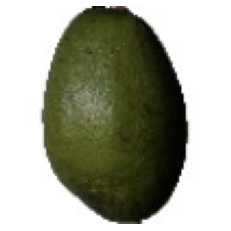

In [4]:
img = load_img(train_path + "Avocado/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
x = img_to_array(img)
x.shape

(100, 100, 3)

In [6]:
numberOfClass = len(glob(train_path + "/*"))

In [7]:
numberOfClass

131

In [8]:
vgg = VGG16()

print(vgg.summary())
print(type(vgg))

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
vgg_layer_list = vgg.layers
print(vgg_layer_list)

[<keras.engine.input_layer.InputLayer object at 0x000001B8DEB3D8E0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001B8E0B82040>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001B8DEA57D90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001B8A6227730>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001B8E0CC9880>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001B8E0CE3E20>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001B8E0C25E80>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001B8E0CF2D00>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001B8E0CFBE50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001B8E0CFB220>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001B8E0CD59D0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001B8E0D0EF10>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001B8E0D16FA0>, <keras.layers.convolutional.conv2d

In [10]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [12]:
for layers in model.layers:
    layers.trainable = False

In [13]:
model.add(Dense(numberOfClass, activation="softmax"))

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [15]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [16]:
# train  
train_data = ImageDataGenerator().flow_from_directory(train_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path,target_size = (224,224))

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [17]:
batch_size = 32

In [18]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=1600//batch_size,
                           epochs= 25,
                           validation_data=test_data,
                           validation_steps= 800//batch_size)

Epoch 1/25
50/50 [==============================] - 214s 4s/step - loss: 3.8659 - accuracy: 0.4025 - val_loss: 1.8139 - val_accuracy: 0.5800
Epoch 2/25
50/50 [==============================] - 231s 5s/step - loss: 0.8606 - accuracy: 0.7525 - val_loss: 0.9693 - val_accuracy: 0.7675
Epoch 3/25
50/50 [==============================] - 214s 4s/step - loss: 0.4938 - accuracy: 0.8531 - val_loss: 0.8813 - val_accuracy: 0.8000
Epoch 4/25
50/50 [==============================] - 214s 4s/step - loss: 0.3161 - accuracy: 0.9056 - val_loss: 0.8604 - val_accuracy: 0.8425
Epoch 5/25
50/50 [==============================] - 223s 4s/step - loss: 0.1937 - accuracy: 0.9406 - val_loss: 0.6759 - val_accuracy: 0.8650
Epoch 6/25
50/50 [==============================] - 222s 4s/step - loss: 0.1889 - accuracy: 0.9369 - val_loss: 0.7479 - val_accuracy: 0.8425
Epoch 7/25
50/50 [==============================] - 218s 4s/step - loss: 0.1436 - accuracy: 0.9588 - val_loss: 0.5834 - val_accuracy: 0.8913
Epoch 8/25
50

In [19]:
model.save_weights("attempt.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


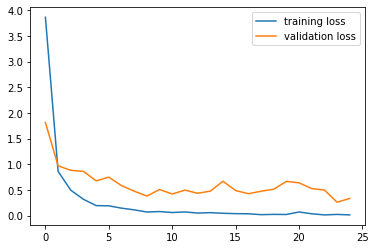

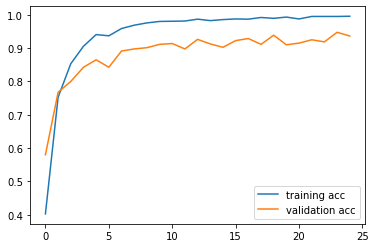

In [21]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.legend()
plt.show()

In [22]:
import json, codecs
with open("attempt.json","w") as f:
    json.dump(hist.history,f)

In [24]:
with codecs.open("attempt.json","r",encoding = "utf-8") as f:
    n = json.loads(f.read())

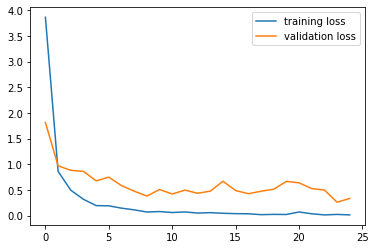

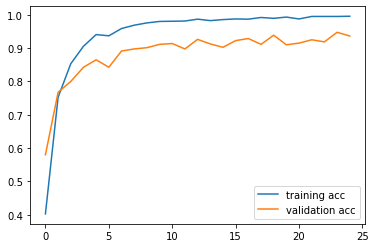

In [25]:
plt.plot(n["loss"],label = "training loss")
plt.plot(n["val_loss"],label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(n["accuracy"],label = "training acc")
plt.plot(n["val_accuracy"],label = "validation acc")
plt.legend()
plt.show()